# Graded Exercise 1: Quadratic integrate and fire

first name: Sébastien

last name: Emery

sciper: 258565

date: 30.03.2020

*Your teammate*

first name of your teammate: Diego

last name of your teammate: Canton

sciper of your teammate: 259304

Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.


## 1.1 Quadratic Integrate and Fire neuron [20 points]
This exercise is not available online. All information is given here.

1.1.1 Read the book chapter about the quadratic integrate and fire neuron
https://neuronaldynamics.epfl.ch/online/Ch5.S3.html

[0 point]

1.1.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

[6 points]

1.1.3 Call your function: 
As above, inject a current into your neuron and plot the response.


[2 points]

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]

1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


** Link to the exercise 3.1 **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

[3 point]

1.1.6 Discuss your observation


[5 point]


# Packages needed

In [1]:
%matplotlib inline
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt

# 1.1.2 Quadratic Integrate and Fire model implementation

In [2]:
# step time
b2.defaultclock.dt = 0.05 * b2.ms

# default values of the model
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
A0 = (1.0/b2.mV)
V_REST = -65.0 * b2.mV
V_C = -35.0* b2.mV
V_RESET = -60.0 * b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

def simulate_quadratic_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        a0 = A0,
        v_rest=V_REST,
        v_c = V_C,
        v_reset=V_RESET,
        v_spike=FIRING_THRESHOLD_v_spike,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the exponential Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        a0 (Quantity) : Curvature parameter of the quadratic model
        v_rest (Quantity): Resting potential
        v_c (Quantity): Critical voltage for spike initiation
        v_reset (Quantity): Reset value (vm after spike)
        v_spike (Quantity) : voltage threshold for the spike condition
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (a0*(v-v_rest)*(v-v_c)+ R * I_stim(t,i))/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

# 1.1.3 Quadratic I&F simulation

### Pulse input response :
The neuron is stimulated with two different amplitudes of pulse input to illustrate its behaviour. The quadratic I&F model with pulse input has two fixed points : u_rest and u_c which are stable and unstable respectively. If the neuron's voltage exceed u_c it will initiate a spike by reaching u_spike and the voltage's simulation is reset at u_reset ( u_spike> u_c) and it continue from there. We found the critical amplitude of pulse input which elicit a spike experimentaly by running the simulation over a range of amplitudes and looking at the response. However, it could be done analitically (if it is possible) by solving the differential equation for a pulse input and finding for which amplitude the voltage's response will be higher than u_c  as in exercise 1 of this course for a LIF. Below, we only plot the response just below and above the critical amplitude.  

All simulations in this section are runned with the default parameters set in the previous section

##### No Spike

nr of spikes: 0


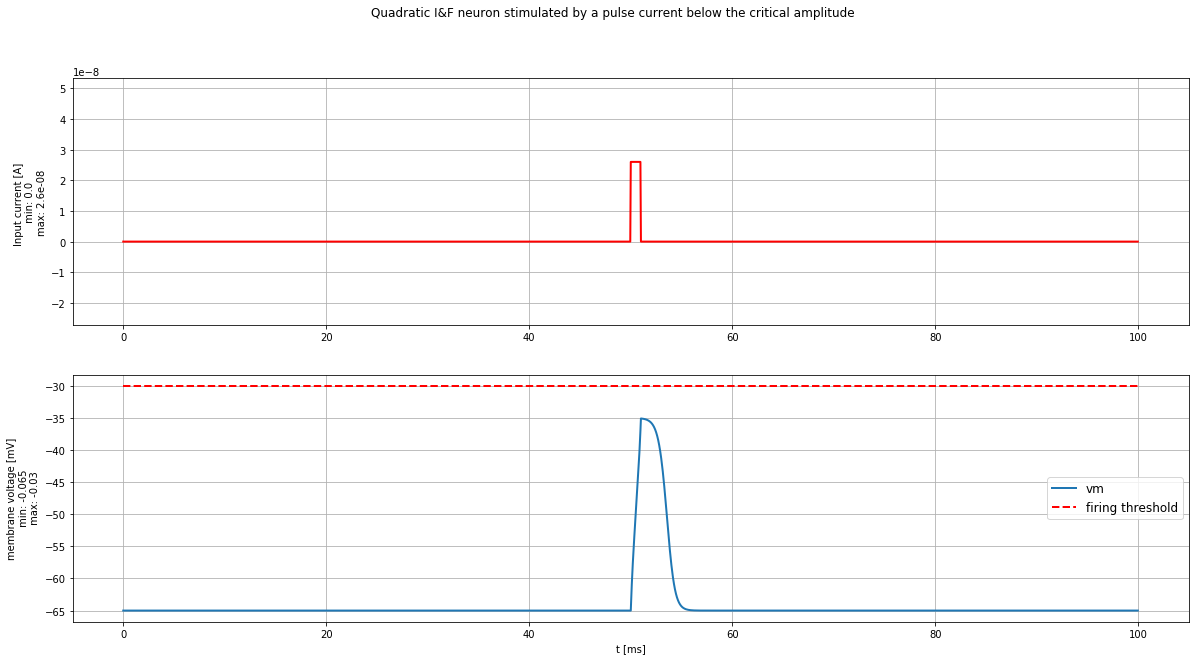

In [3]:
# create a spike_current with an amplitude lower than the critical mplitude
spike_current = input_factory.get_spikes_current(t_spikes = [50], unit_time=b2.ms,amplitude=26*b2.namp)

# Run the simulation
(state_monitor,spike_monitor) = simulate_quadratic_IF_neuron(I_stim=spike_current, simulation_time =100 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor, spike_current, title="Quadratic I&F neuron stimulated by a pulse current below the critical amplitude", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

The pulse in input raise the neuron's voltage in a very fast exponential growth. The amplitude is not high enough to elicit a spike (v_neuron< v_c), therefore the neuron return to the resting potential in an exponential decay ,which is the stable fixed point and attracts the dynamic.

##### Spike 

nr of spikes: 1


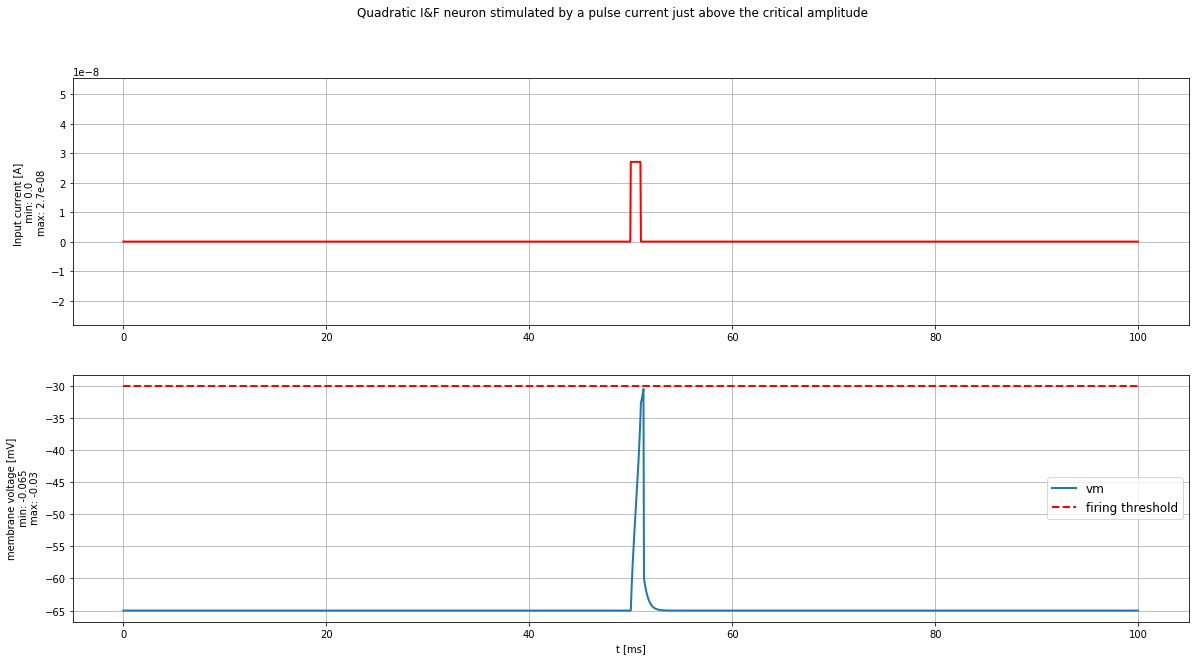

In [4]:
# create a spike_current with an amplitude just above the critical amplitude
spike_current = input_factory.get_spikes_current(t_spikes = [50], unit_time=b2.ms,amplitude=27*b2.namp)

# Run the simulation
(state_monitor,spike_monitor) = simulate_quadratic_IF_neuron(I_stim=spike_current, simulation_time = 100 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor, spike_current, title="Quadratic I&F neuron stimulated by a pulse current just above the critical amplitude", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

The pulse input raise the neuron's voltage in a very fast exponential growth. The amplitude is now high enough to elicit a spike (v_neuron > v_c), therefore the neuron voltage increases in a quadratic fashion from the voltage reached by the pulse to the spike voltage of the simulation (sharp quadratic part in the graph -33 to -30 mv). Then it is reset and it returns to the resting potential, by which it is attracted (v_reset<v_c), in an exponential decay.

### Step input :
The neuron is stimulated with two different amplitudes of step inputs. However, this kind of currents do not affect the initial condition of the voltage (as in the pulse input). On the contrary it shifts the quadratic curve upward in a phase plane analysis (lecture 1). Therefore, there is a critical current where the quadratic curve intersects the horizontal axis once at the minimum of the curve which is called v_RH ( middle point between v_rest and v_c) and if the current is set just above it starts repetitive firing . From the the dynamics, we can calculate the critical current (I_RH) at which it is the case by setting the derivative to zero and the voltage at V_RH. Below, we calculate the theoritical I_RH value and stimulate the neuron with two different step inputs of amplitudes equal and just above I_RH to illustrates the behaviour of the dynamics

In [5]:
#calculate the minimal current to elicit repetitive firing 
V_RH = (V_REST+V_C)/2.0
print(V_RH)
I_RH = (-A0*(V_RH-V_REST)*(V_RH-V_C))/MEMBRANE_RESISTANCE_R
print(I_RH)

-50. mV
11.25 nA


##### No repetitive firing

nr of spikes: 0


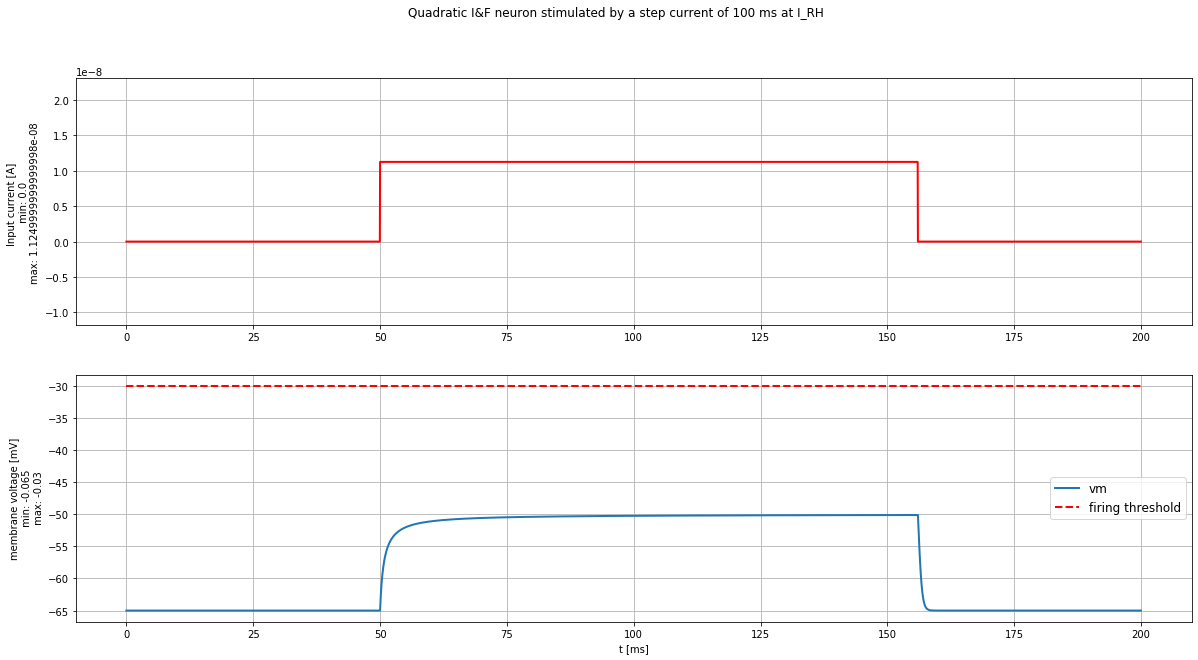

In [6]:
# create a step_current of amplitude I_RH which is the limit to elicit repetitive firing
step_current = input_factory.get_step_current(t_start=50, t_end=155, unit_time=b2.ms,amplitude=I_RH)

# Run the simulation
(state_monitor,spike_monitor) = simulate_quadratic_IF_neuron(I_stim=step_current, simulation_time = 200 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Quadratic I&F neuron stimulated by a step current of 100 ms at I_RH", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

As expected the current is not high enough to elicit repetitive firing at I_RH, it is the limit. The neuron's voltage growth in an exponential fashion to the the new stable fixed point when applying the stimulation. In this case (at I_RH) only one fixed point remains at V_RH which is stable, as expected the voltage reach  V_RH = -50 mv and it stabilizes. When the stimulation is stopped the model returns to the two fixed points V_rest and V_C and the the voltage decreases in an exponential decay until it reaches the stable fixed point V_rest.

##### Repetitive firing

nr of spikes: 6


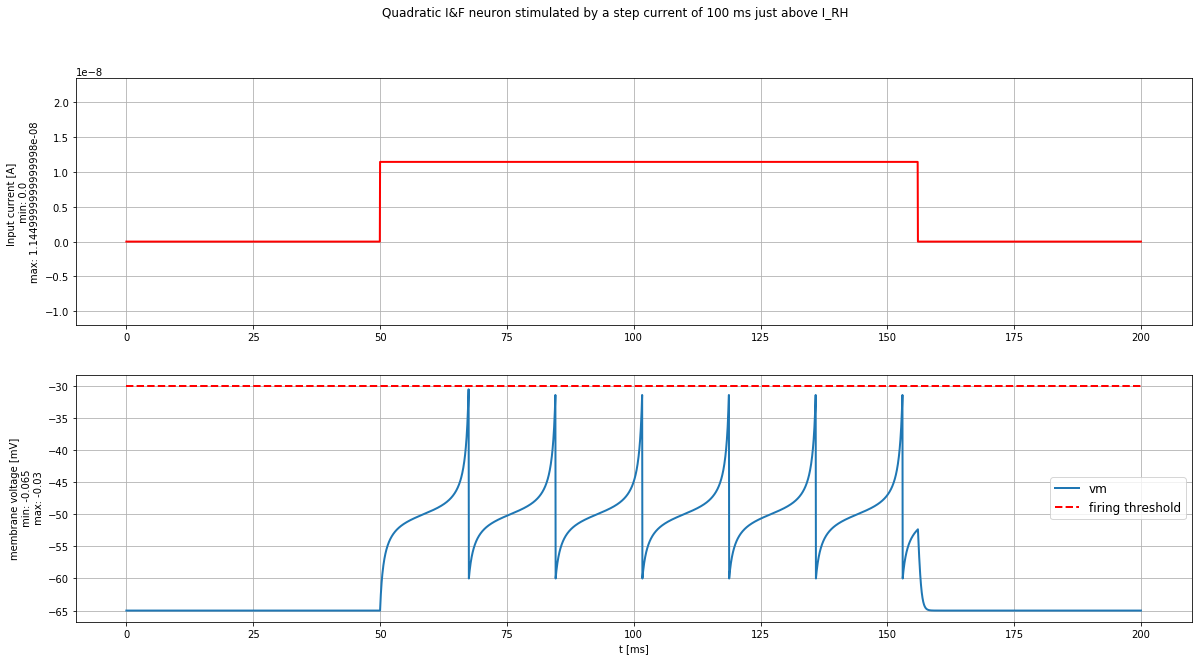

In [7]:
# create a step_current of amplitude above I_RH to elicit repetitive firing
step_current = input_factory.get_step_current(t_start=50, t_end=155, unit_time=b2.ms,amplitude=I_RH + 0.2*b2.namp)

# Run the simulation
(state_monitor,spike_monitor) = simulate_quadratic_IF_neuron(I_stim=step_current, simulation_time = 200 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Quadratic I&F neuron stimulated by a step current of 100 ms just above I_RH", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Now the stimulation amplitude is high enough to elicit repetitive firing as the quadratic curve is shifted above the horizontal axis in the phase plane. Therefore,the current first increases from V_rest to V_spike and then it is reset at V_reset. From there it follows the same repetitive pattern until we stop the current and it decreases in an exponential decay to V_rest which is a stable fixed point again. The slope of the spikes reflect the quadratic curvature which is first high and decreasing until it reaches V_RH (the minimum) and then it increases again until it reaches V-spike.

# 1.1.4 Exponential I&F approximation

In [8]:
# Approximation of  the exponential model solved on paper
# Use the default parameters of th exp_IF module

A_0 = 1./ (2.*exp_IF.SHARPNESS_delta_T)  
print(A_0)
V_rest = exp_IF.RHEOBASE_THRESHOLD_v_rh - (np.sqrt(2*exp_IF.SHARPNESS_delta_T*(exp_IF.RHEOBASE_THRESHOLD_v_rh-(exp_IF.V_REST+exp_IF.SHARPNESS_delta_T)))) 
print(V_rest)
V_C = exp_IF.RHEOBASE_THRESHOLD_v_rh + (np.sqrt(2*exp_IF.SHARPNESS_delta_T*(exp_IF.RHEOBASE_THRESHOLD_v_rh-(exp_IF.V_REST+exp_IF.SHARPNESS_delta_T))))  
print(V_C)

0.25 mV^-1
-60.65685425 mV
-49.34314575 mV


# 1.1.5  Exact and approximated exponential I&F simulation

##### Rheobase current computation 

In [9]:
# I_rh calculation
I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh-exp_IF.V_REST-exp_IF.SHARPNESS_delta_T)/(exp_IF.MEMBRANE_RESISTANCE_R)
print(I_rh)

0.4 nA


##### Simulation of the exact and approximated exponantial I&F models above I_RH
Use the default parameters of the exp_IF module and the value calculated in the previous section for the quadratic model

nr of spikes: 12
nr of spikes: 11


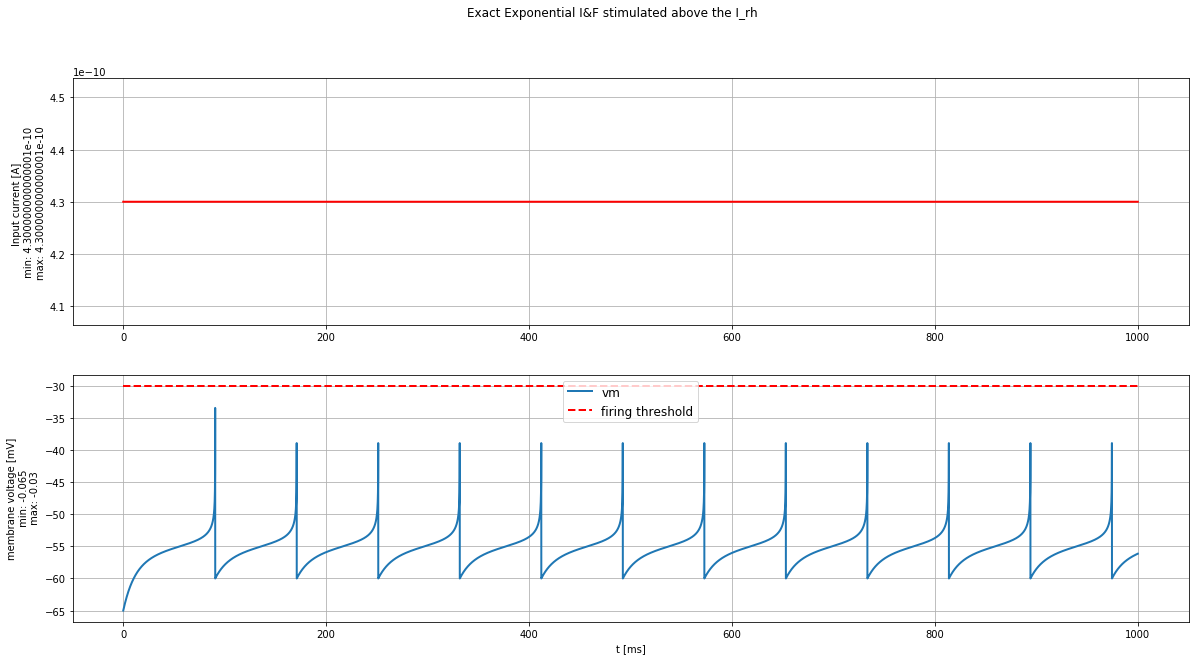

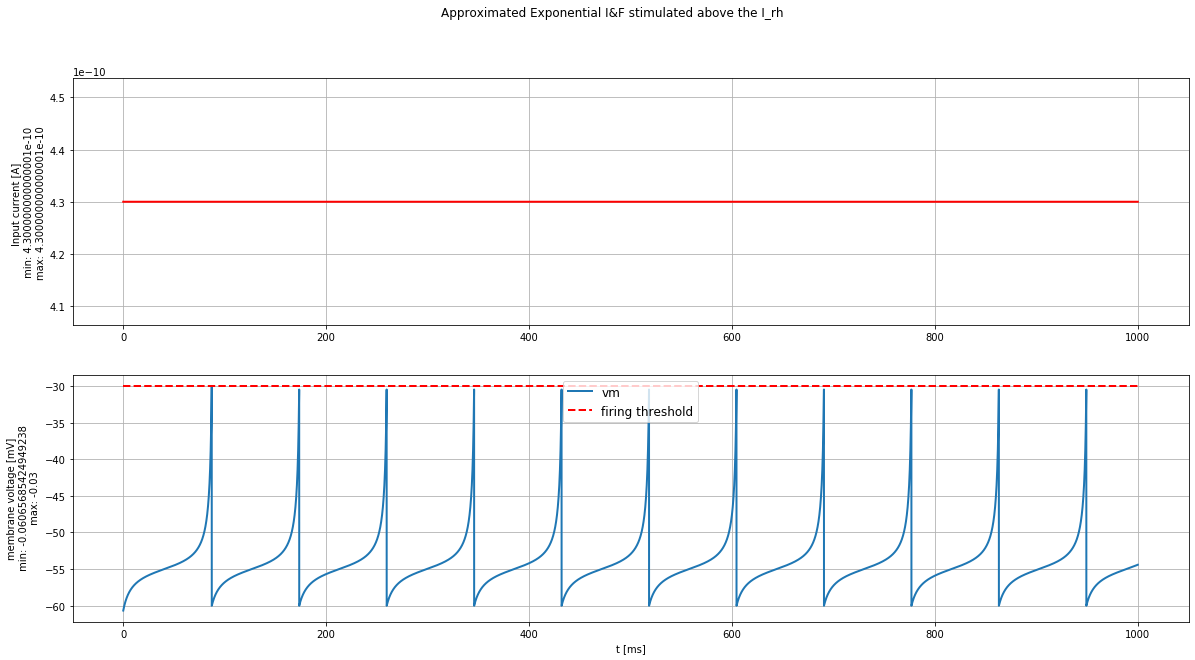

In [10]:
# create a step_current just above I_rh
step_current = input_factory.get_step_current(t_start=0, t_end=1000, unit_time=b2.ms,amplitude=(I_rh)+(0.03*b2.namp))

# Exact exponential I&F simulation

# Run the simulation
(state_monitor_exact,spike_monitor_exact) = exp_IF.simulate_exponential_IF_neuron(I_stim=step_current, simulation_time = 1000 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_exact, step_current, title="Exact Exponential I&F stimulated above the I_rh", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor_exact.count[0]))

# Approximated exponential I&F simulation

# Run the simulation 
(state_monitor_approx,spike_monitor_approx) = simulate_quadratic_IF_neuron(a0 = A_0,v_rest=V_rest,v_c = V_C,I_stim=step_current, simulation_time = 1000 * b2.ms)

#Plot the response of I and V
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_approx, step_current, title="Approximated Exponential I&F stimulated above the I_rh", firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor_approx.count[0]))


## 1.1.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

Observations on the 1.1.3 is integrated in the section.

###### Exact and approximated exponential I&F:
We can see that the dynamics between both simulation is approximatively the same, but there is some differences :

a) They don't start at the same resting potential, which would make sense if we use the same neuron. In fact, the resting potential in the quadratic approximation is a little bit higher.

b) The slopes of the spikes behave a little bit differently. This was expected as we matched the two models at the rheobase threshold. Therefore the approximation is really valid in the neighborhood of this voltage (the inflection point). Before this voltage, the quadratic curve in the phase plane is positive and higher than the exponential curve which is linear in this portion. So the slope of the spikes in the quadratic approximation is a little bit steeper than in the exact model. On the contrary, after this point the exponential curve is exponential and therefore it increases faster than the quadratic curve. Henceforth, it is higher than the quadratic curve and the slope is now steeper in the exact model.

c) The approximated model is delayed compare to the exact one. At each spike the delay accumulates and by running the simulation for 1 second, we have a delay of one spike aproximatively, 11 in the approximated and  12 in the exact one. This can be explained as the exponential growth is really fast compare to the quadratic one in the second part of the spike, so it reaches v_spike faster even if  the approximated is in advance in the first part.

The exp_IF module do not reach v_spike = -30mV (default value) to be reset, it is reset before which is weird as the example in the book reach the same v_spike in both case. It is probably due to a bug in the display or the implementation.

# Ex. 2. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.adex_model.html) to run the model for different input currents and different parameters. Get started by running the following script:

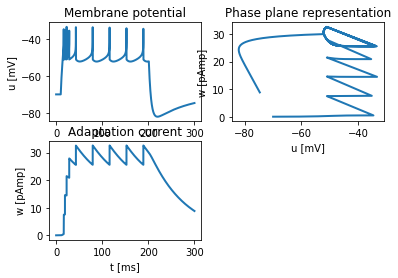

nr of spikes: 9


In [11]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

""" The getting.started() example call the function AdEx.simulate_AdEx_neuron() 
    with the default parameters and with a stimulating step current of 65pA """

AdEx.getting_started()

## 2.1. Exercise: Adaptation and firing patterns [7 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

<b>Description of the firing pattern above</b> : From the membrane potential plot above, it looks like the the firing pattern (for default parameters) is an initial burst response to a high step current.

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.1 provides a starting point for your explorations. 

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

[2 points]

### Adapting firing pattern

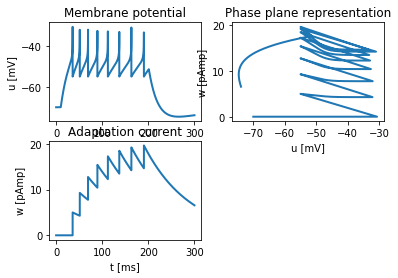

nr of spikes: 8


In [12]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#constant parameters 
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

#modified parameters 
MEMBRANE_TIME_SCALE_tau_m = 20 * b2.ms 
ADAPTATION_VOLTAGE_COUPLING_a = 0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 5.0 * b2.pA
V_RESET = -55.0 * b2.mV

#technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV 

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(MEMBRANE_TIME_SCALE_tau_m,
                                                         MEMBRANE_RESISTANCE_R,
                                                         V_REST,
                                                         V_RESET,
                                                         RHEOBASE_THRESHOLD_v_rh,
                                                         ADAPTATION_VOLTAGE_COUPLING_a,
                                                         SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                         FIRING_THRESHOLD_v_spike,
                                                         SHARPNESS_delta_T,
                                                         ADAPTATION_TIME_CONSTANT_tau_w,                                                        
                                                         current, 
                                                         simulation_time=300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)
print("nr of spikes: {}".format(spike_monitor.count[0]))

[2 points]

### Bursting firing pattern

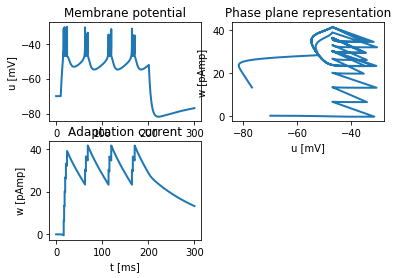

nr of spikes: 15


In [13]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#constant parameters 
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

#modified parameters 
MEMBRANE_TIME_SCALE_tau_m = 5.0 * b2.ms 
ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -47.0 * b2.mV

#technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(MEMBRANE_TIME_SCALE_tau_m,
                                                         MEMBRANE_RESISTANCE_R,
                                                         V_REST,
                                                         V_RESET,
                                                         RHEOBASE_THRESHOLD_v_rh,
                                                         ADAPTATION_VOLTAGE_COUPLING_a,
                                                         SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                         FIRING_THRESHOLD_v_spike,
                                                         SHARPNESS_delta_T,
                                                         ADAPTATION_TIME_CONSTANT_tau_w,                                                        
                                                         current, 
                                                         simulation_time=300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)
print("nr of spikes: {}".format(spike_monitor.count[0]))

[2 points]

### Irregular firing pattern

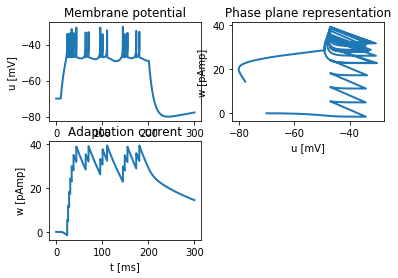

nr of spikes: 17


In [14]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#constant parameters 
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

#modified parameters 
MEMBRANE_TIME_SCALE_tau_m = 11 * b2.ms 
ADAPTATION_VOLTAGE_COUPLING_a = -0.8 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7 * b2.pA
V_RESET = -47.0 * b2.mV

#technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV 

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(MEMBRANE_TIME_SCALE_tau_m,
                                                         MEMBRANE_RESISTANCE_R,
                                                         V_REST,
                                                         V_RESET,
                                                         RHEOBASE_THRESHOLD_v_rh,
                                                         ADAPTATION_VOLTAGE_COUPLING_a,
                                                         SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                         FIRING_THRESHOLD_v_spike,
                                                         SHARPNESS_delta_T,
                                                         ADAPTATION_TIME_CONSTANT_tau_w,                                                        
                                                         current, 
                                                         simulation_time=300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 2.2. Exercise: phase plane and nullclines [12 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- What is the direction of the flow arrows on the u-nullcline ?
- How do the nullclines change with respect to `a`?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

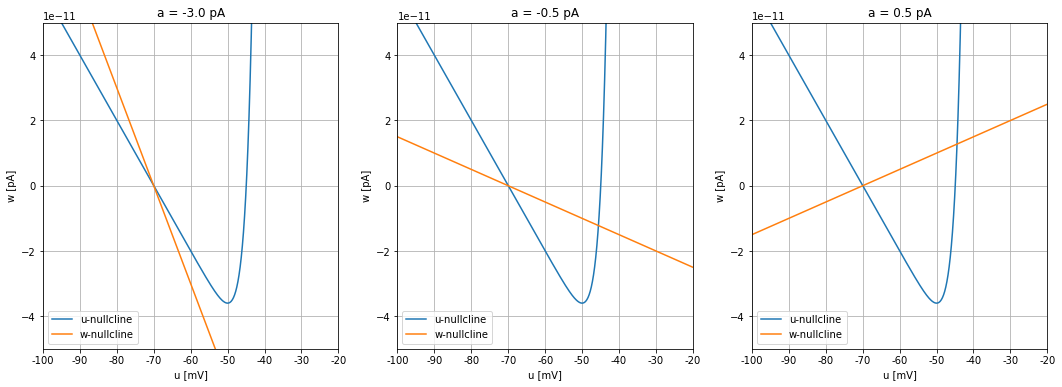

In [15]:
""" Phase plane and nullclines for I(t)=0 """

import numpy as np
import matplotlib.pyplot as plt

MEMBRANE_RESISTANCE_R = 500.0e6 
V_REST = -70.0e-3 
RHEOBASE_THRESHOLD_v_rh = -50.0e-3
SHARPNESS_delta_T = 2.0e-3

ADAPTATION_VOLTAGE_COUPLING_a = [-3.0e-9, -0.5e-9, 0.5e-9]
MEMBRANE_TIME_SCALE_tau_m = 20e-3
ADAPTATION_TIME_CONSTANT_tau_w = 100.0e-3
#SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0e-12

u = np.arange(-100e-3,-20e-3,0.1e-3)

fig, axes = plt.subplots(ncols=3, figsize=(18,6))
ax = axes.ravel()

for ind, a in enumerate(ADAPTATION_VOLTAGE_COUPLING_a): 
    
    # u-nullcline
    w1 = ( -(u-V_REST) + SHARPNESS_delta_T*np.exp( (u-RHEOBASE_THRESHOLD_v_rh)/SHARPNESS_delta_T ) )/MEMBRANE_RESISTANCE_R

    # w-nullcline
    w2 = ( a*(u-V_REST) )
    
    ax[ind].plot(u, w1, label='u-nullcline')
    ax[ind].plot(u, w2, label='w-nullcline')
    ax[ind].set_xlim([-100e-3, -20e-3]) 
    locs, labels = ax[ind].get_xticks(), ax[ind].get_xticklabels()
    labels = [round(float(item)*1e+3) for item in locs]
    ax[ind].set_xticklabels(labels)
    ax[ind].set_ylim([-50e-12, 50e-12]) 
    ax[ind].set_xlabel('u [mV]')
    ax[ind].set_ylabel('w [pA]')
    ax[ind].set_title('a = {} pA'.format(a*10**9))
    ax[ind].grid(True, which='both')
    ax[ind].legend()

<b>What is the direction of the flow arrows on the u-nullcline ?</b>

The fixed points are at the intersection between the u- and the w-nullclines. For a=0 and I(t)=0, there are 2 fixed point for the AdEx model, a stable one, on the left, which correspond to the resting potential (V_RESET) and an unstable one, which correspond to the critical threshold whereafter a firing threshold is triggered. On the u-nullcline, on the left of the stable fixed point and on the right of the unstable one, the flow arrows are pointing down and their are pointing up between the two fixed points. 

<b>How do the nullclines change with respect to a?</b>

The parameter a change the slope of the w-nullcline. For  values of a < -2.0 pA, there is only one fixed point. 

<b>What is the interpretation of parameter b?</b>

The parameter b correpond to the strength of the adaptation current just after a spike. It's the amplitude of the jump after the spike and it is characterized by a jump of trajectories in the phase plan. When u reaches the reset threshold, the trajectorie is reset to (u_reset, w+b). It corresponds to the jumps we see in the "phase plan representation" images above (for the different pattern representations). A biophysical interpretation of parameters b is given in chap. 6.1. The increase is due to calcium entering the cell during an action potential, which increase the amplitude of a calcium-dependent potassium current. 

<b>How do flow arrows change as tau_w gets bigger?</b>

The change <i>Δw</i> will be smaller, which means that the arrows will have a smaller vertical component. So the flow will be mostly horizontal. 

Take `a = 0`. Find a set of parameters such that, by changing `b` only, we can see two qualitatively different firing patterns. Simulate these two patterns and write their names.

[4 points]

### firing pattern :  Tonic

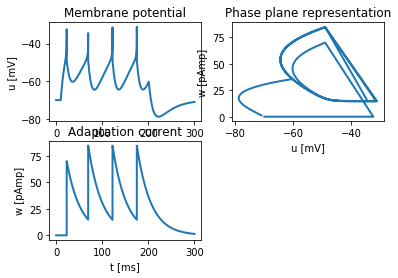

nr of spikes: 4


In [16]:
# First firing pattern (simulation [2 points] and pattern name [2 points])

%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#constant parameters 
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

#modified parameters 
MEMBRANE_TIME_SCALE_tau_m = 10.0 * b2.ms 
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 30.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 70.0 * b2.pA
V_RESET = -49.0 * b2.mV

#technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(MEMBRANE_TIME_SCALE_tau_m,
                                                         MEMBRANE_RESISTANCE_R,
                                                         V_REST,
                                                         V_RESET,
                                                         RHEOBASE_THRESHOLD_v_rh,
                                                         ADAPTATION_VOLTAGE_COUPLING_a,
                                                         SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                         FIRING_THRESHOLD_v_spike,
                                                         SHARPNESS_delta_T,
                                                         ADAPTATION_TIME_CONSTANT_tau_w,                                                        
                                                         current, 
                                                         simulation_time=300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)
print("nr of spikes: {}".format(spike_monitor.count[0]))

[4 points]

### firing pattern : Initial Burst

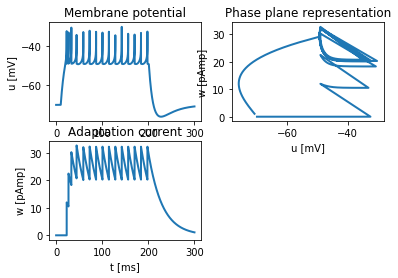

nr of spikes: 15


In [17]:
# Second firing pattern (simulation [2 points] and pattern name [2 points])

%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#constant parameters 
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

#modified parameters 
MEMBRANE_TIME_SCALE_tau_m = 10.0 * b2.ms 
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 30.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 12.0 * b2.pA
V_RESET = -49.0 * b2.mV

FIRING_THRESHOLD_v_spike = -30. * b2.mV #technical threshold to tell the algorithm when to reset vm to v_reset

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(MEMBRANE_TIME_SCALE_tau_m,
                                                         MEMBRANE_RESISTANCE_R,
                                                         V_REST,
                                                         V_RESET,
                                                         RHEOBASE_THRESHOLD_v_rh,
                                                         ADAPTATION_VOLTAGE_COUPLING_a,
                                                         SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                         FIRING_THRESHOLD_v_spike,
                                                         SHARPNESS_delta_T,
                                                         ADAPTATION_TIME_CONSTANT_tau_w,                                                        
                                                         current, 
                                                         simulation_time=300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)
print("nr of spikes: {}".format(spike_monitor.count[0]))

<b>NOTE : </b>We choose the parameters above inspired from fig. 6.6 (Chap. 6.2), which shows the parameter space for the AdEx model. 